In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [2]:
from  sklearn.model_selection import train_test_split

In [3]:
sns.set(style="darkgrid", color_codes=True)

In [4]:
path=r"/Users/nicolo/Desktop/Uni_project/pid-5M.csv"

In [5]:
data=pd.read_csv(path)

In [6]:
data

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256
...,...,...,...,...,...,...,...
4999995,211,0.835889,0.495847,0.975812,0,0.000000,0.046967
4999996,211,2.027470,0.287966,1.222890,0,0.197894,0.186404
4999997,211,0.827497,0.689746,0.980957,0,0.000000,0.000000
4999998,2212,1.331200,0.382746,0.811818,0,0.036942,0.056947


In [7]:
data=data.head(50000)
data

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256
...,...,...,...,...,...,...,...
49995,211,1.205000,0.372458,0.988503,0,0.029572,0.049577
49996,2212,0.899519,0.685490,0.701149,0,0.000000,0.000000
49997,211,2.112610,0.177894,0.996632,0,0.027283,0.041749
49998,211,0.913405,0.454171,1.000300,0,0.026596,0.000000


In [8]:
y=data.id
y.unique()


array([ 211, 2212,  321,  -11])

In [9]:
y[0]

211

In [10]:
y

0         211
1         211
2        2212
3         211
4        2212
         ... 
49995     211
49996    2212
49997     211
49998     211
49999     211
Name: id, Length: 50000, dtype: int64

In [11]:
for i in range(0,50000):
    if y[i]==211:
       y[i]=0
    else:
       y[i]=1

/var/folders/w2/vjpbmwkj10s_w78j4p9hxlyh0000gn/T/ipykernel_1126/823603527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i]=0
/var/folders/w2/vjpbmwkj10s_w78j4p9hxlyh0000gn/T/ipykernel_1126/823603527.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i]=1


In [12]:
y.unique()

array([0, 1])

In [13]:
y

0        0
1        0
2        1
3        0
4        1
        ..
49995    0
49996    1
49997    0
49998    0
49999    0
Name: id, Length: 50000, dtype: int64

In [14]:
df=data.drop(['id'],axis=1)

In [15]:
np.unique(y,return_counts = True)

(array([0, 1]), array([27974, 22026]))

In [16]:
dt=pd.concat((df,y),axis=1)

In [17]:
dt

,p,theta,beta,nphe,ein,eout,id
0,0.780041,1.081480,0.989962,0,0.000000,0.000000,0
1,0.260929,0.778892,0.902450,0,0.000000,0.000000,0
2,0.773022,0.185953,0.642428,4,0.101900,0.000000,1
3,0.476997,0.445561,0.951471,0,0.000000,0.000000,0
4,2.123290,0.337332,0.908652,0,0.034379,0.049256,1
...,...,...,...,...,...,...,...
49995,1.205000,0.372458,0.988503,0,0.029572,0.049577,0
49996,0.899519,0.685490,0.701149,0,0.000000,0.000000,1
49997,2.112610,0.177894,0.996632,0,0.027283,0.041749,0
49998,0.913405,0.454171,1.000300,0,0.026596,0.000000,0


In [18]:
df_0 = dt[dt.id == abs(0)]
df_0

,p,theta,beta,nphe,ein,eout,id
0,0.780041,1.081480,0.989962,0,0.000000,0.000000,0
1,0.260929,0.778892,0.902450,0,0.000000,0.000000,0
3,0.476997,0.445561,0.951471,0,0.000000,0.000000,0
5,0.403296,0.694215,0.958553,0,0.000000,0.000000,0
10,0.612497,0.809353,0.982344,0,0.000000,0.000000,0
...,...,...,...,...,...,...,...
49994,1.059890,0.316029,1.004300,0,0.032639,0.052415,0
49995,1.205000,0.372458,0.988503,0,0.029572,0.049577,0
49997,2.112610,0.177894,0.996632,0,0.027283,0.041749,0
49998,0.913405,0.454171,1.000300,0,0.026596,0.000000,0


In [19]:
df_1=dt[dt.id==abs(1)]
df_1

,p,theta,beta,nphe,ein,eout,id
2,0.773022,0.185953,0.642428,4,0.101900,0.000000,1
4,2.123290,0.337332,0.908652,0,0.034379,0.049256,1
6,1.382620,0.436689,0.844835,0,0.200275,0.053651,1
7,1.133130,0.276831,0.781295,0,0.044038,0.093980,1
8,0.656291,0.542507,0.560291,0,0.083406,0.000000,1
...,...,...,...,...,...,...,...
49988,0.599832,0.525916,0.770316,0,0.000000,0.000000,1
49989,1.421840,0.456268,0.831724,0,0.028061,0.225727,1
49990,1.643850,0.332099,0.885782,0,0.146212,0.044724,1
49993,1.361720,0.351195,0.816579,0,0.043763,0.068574,1


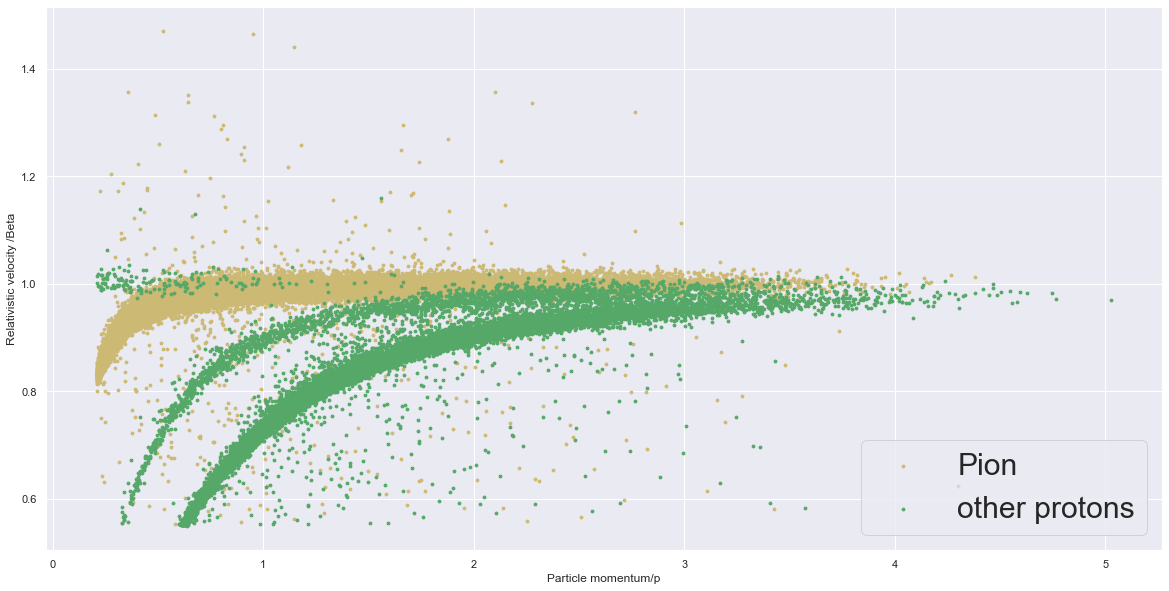

In [20]:
plt.subplots(figsize=(20,10))
plt.scatter(df_0.p,df_0.beta,color='y',s=8,label='Pion')
plt.scatter(df_1.p,df_1.beta,color='g',s=8,label='other protons')
plt.xlabel('Particle momentum/p')
plt.ylabel('Relativistic velocity /Beta')
plt.legend(loc="lower right", fontsize=30)



In [21]:
y=dt.id
x=dt.drop('id',axis=1)

In [22]:
x

,p,theta,beta,nphe,ein,eout
0,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2.123290,0.337332,0.908652,0,0.034379,0.049256
...,...,...,...,...,...,...
49995,1.205000,0.372458,0.988503,0,0.029572,0.049577
49996,0.899519,0.685490,0.701149,0,0.000000,0.000000
49997,2.112610,0.177894,0.996632,0,0.027283,0.041749
49998,0.913405,0.454171,1.000300,0,0.026596,0.000000


In [23]:
y

0        0
1        0
2        1
3        0
4        1
        ..
49995    0
49996    1
49997    0
49998    0
49999    0
Name: id, Length: 50000, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [26]:
x_train.head(10)

,p,theta,beta,nphe,ein,eout
5262,0.350347,0.361547,0.936459,0,0.000000,0.000000
14332,0.463874,0.786034,0.962373,0,0.000000,0.000000
1200,0.856947,0.310310,0.679925,0,0.000000,0.000000
18966,0.243381,0.761655,0.852810,0,0.000000,0.000000
24819,0.698100,0.252399,0.969792,0,0.035752,0.175143
47720,0.356146,0.896372,0.969159,0,0.000000,0.000000
22923,0.381323,1.421790,0.971935,0,0.000000,0.000000
48804,0.612497,1.118230,0.954526,0,0.000000,0.000000
10241,1.222550,0.307722,0.792653,0,0.097322,0.117281
1900,0.314794,0.780320,0.910884,0,0.000000,0.000000


In [27]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.50)

In [28]:
x_test.head(10)

,p,theta,beta,nphe,ein,eout
37857,1.421530,0.311608,0.823032,0,0.075349,0.291508
16218,0.449683,0.837698,0.970285,0,0.000000,0.000000
11488,0.744945,0.207983,0.986018,0,0.021012,0.040147
45861,1.327080,0.422459,0.831020,0,0.067155,0.000000
38514,1.761350,0.508427,0.876666,0,0.033051,0.036576
20803,0.589761,0.474977,0.992058,0,0.054108,0.000000
38255,1.461050,0.153500,0.848379,0,0.109682,0.498558
25134,1.251540,0.240825,0.789964,0,0.089174,0.192721
4226,2.099790,0.381182,0.918225,0,0.000000,0.076402
41030,0.904250,0.700408,0.993677,0,0.000000,0.000000


In [29]:
data[29170:29172]

,id,p,theta,beta,nphe,ein,eout
29170,0,1.33928,0.742983,0.992652,0,0.000000,0.0000
29171,1,1.44991,0.486340,0.838560,0,0.210666,0.1149


In [30]:
x_val.head(10)

,p,theta,beta,nphe,ein,eout
5906,1.897150,0.229171,0.989508,0,0.027695,0.090639
4632,0.706950,0.567257,0.973680,0,0.037262,0.000000
1297,0.389105,0.604404,0.938993,0,0.000000,0.000000
24268,0.702831,0.231886,0.615502,0,0.074525,0.000000
12470,0.426947,1.000250,0.962636,0,0.000000,0.000000
21766,0.584726,0.881701,0.954549,0,0.000000,0.000000
27884,1.288010,0.299760,0.921824,0,0.219089,0.000000
31608,0.332341,1.085100,0.918243,23,0.000000,0.000000
2963,0.945144,0.358372,0.705860,0,0.050629,0.095949
1966,0.383154,0.585661,0.923129,0,0.000000,0.000000


In [31]:
print("Shape of validation set:", x_val.shape)
print("Shape of test set:", x_test.shape)
print("Shape of training set:", x_train.shape)

Shape of validation set: (7500, 6)
Shape of test set: (7500, 6)
Shape of training set: (35000, 6)


# Decision tree classifier

## gini criterion

In [32]:
from sklearn.tree import DecisionTreeClassifier
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [33]:
dtree = DecisionTreeClassifier(criterion='gini')
t=dtree.fit(x_train,y_train)
predictions = dtree.predict(x_val)
print(predictions)
print(len(predictions))

[1 0 0 ... 1 1 0]
7500


In [38]:
score1=accuracy_score(y_val,predictions)
print(score1)
score2=accuracy_score(y,y_pred)
print(score2)

0.9626666666666667
0.9636


In [39]:
from sklearn.metrics import precision_score
print(precision_score(y, y_pred))

from sklearn.metrics import recall_score
print(recall_score(y, y_pred))

from sklearn.metrics import f1_score
print(f1_score(y, y_pred))

0.9579367237784425
0.9595024062471624
0.9587189257847941


In [36]:
from sklearn.model_selection import cross_val_score
cross_val_score(dtree, x, y, cv=3, scoring="accuracy")

array([0.96178076, 0.96544069, 0.96189848])

In [37]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(dtree, x, y, cv=3)

In [40]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [41]:
print(len(y_pred))

50000


In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[27046,   928],
       [  892, 21134]])

In [43]:
X=np.array(x_test)

In [44]:
x_test

,p,theta,beta,nphe,ein,eout
37857,1.421530,0.311608,0.823032,0,0.075349,0.291508
16218,0.449683,0.837698,0.970285,0,0.000000,0.000000
11488,0.744945,0.207983,0.986018,0,0.021012,0.040147
45861,1.327080,0.422459,0.831020,0,0.067155,0.000000
38514,1.761350,0.508427,0.876666,0,0.033051,0.036576
...,...,...,...,...,...,...
32086,0.920424,0.803042,0.703219,0,0.000000,0.000000
47631,0.902266,0.319553,0.990663,0,0.000000,0.000000
31794,0.810559,0.556641,0.654657,0,0.085374,0.000000
31751,0.423133,0.602613,0.951110,0,0.000000,0.000000


In [45]:
X

array([[1.42153e+00, 3.11608e-01, 8.23032e-01, 0.00000e+00, 7.53490e-02,
        2.91508e-01],
       [4.49683e-01, 8.37698e-01, 9.70285e-01, 0.00000e+00, 0.00000e+00,
        0.00000e+00],
       [7.44945e-01, 2.07983e-01, 9.86018e-01, 0.00000e+00, 2.10117e-02,
        4.01465e-02],
       ...,
       [8.10559e-01, 5.56641e-01, 6.54657e-01, 0.00000e+00, 8.53742e-02,
        0.00000e+00],
       [4.23133e-01, 6.02613e-01, 9.51110e-01, 0.00000e+00, 0.00000e+00,
        0.00000e+00],
       [2.90074e+00, 2.81596e-01, 1.00148e+00, 4.30000e+01, 2.16297e-01,
        2.69535e-01]])

In [46]:
dtree.predict([X[4]])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [47]:
dtree.predict([X[2]])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [48]:
dtree.predict([X[0]])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [49]:
dtree.predict([X[1]])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [50]:
dtree.predict(X)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1, 0, 0, ..., 1, 0, 0])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


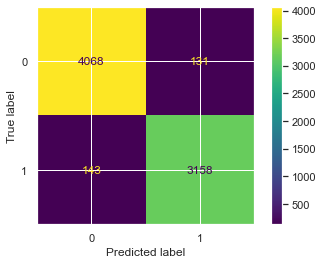

In [51]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtree,x_test, y_test)

In [52]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y, y_pred) 

In [53]:
print(fpr)
print(tpr)
print(threshold)

[0.         0.03317366 1.        ]
[0.         0.95950241 1.        ]
[2 1 0]


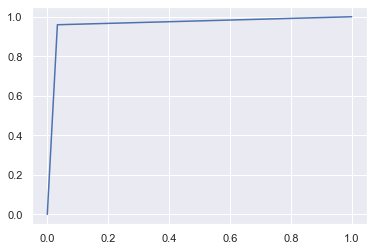

In [54]:
plt.plot(fpr,tpr)

### Define the ROC curve function

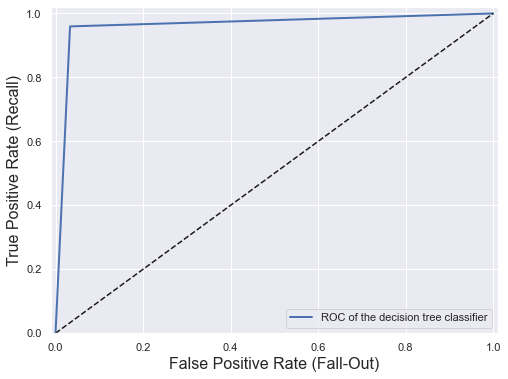

In [55]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([-0.01, 1.01, 0, 1.02])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)                                            
    
plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr, tpr,"ROC of the decision tree classifier")
plt.legend(loc='best')
plt.show()

In [56]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, y_pred)

0.9631643724951405

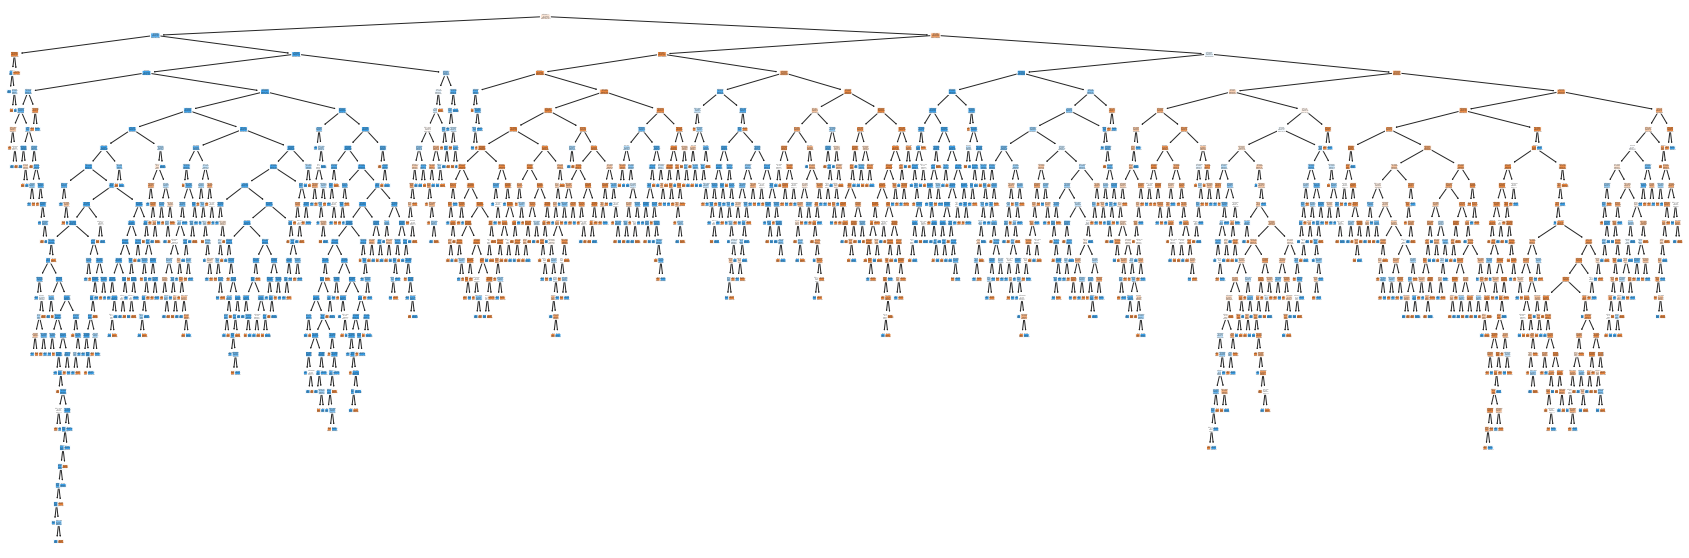

In [77]:
plt.figure(figsize = (30,10))
diagram= sklearn.tree.plot_tree(t,feature_names = df.columns,filled = True , precision = 4, rounded = True)

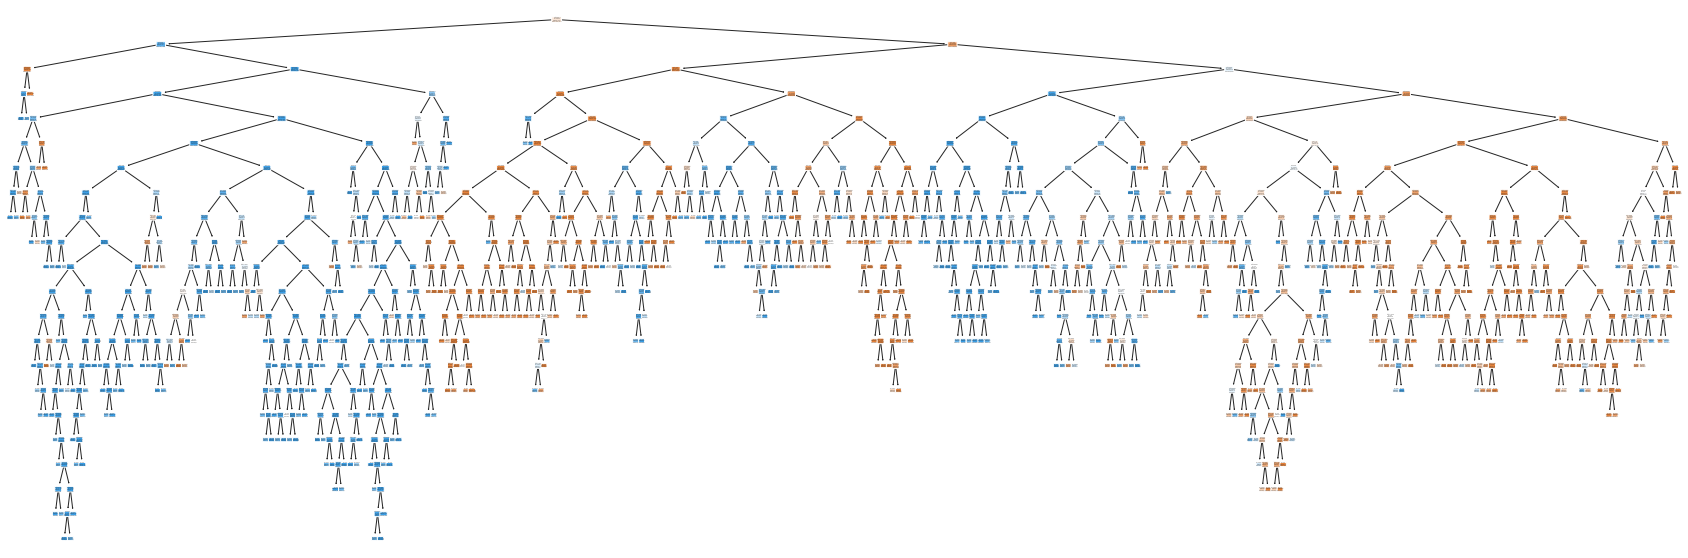

In [78]:
dtree1 = DecisionTreeClassifier(criterion='gini',min_samples_leaf=5)
t1=dtree1.fit(x_train,y_train)
plt.figure(figsize = (30,10))
diagram= sklearn.tree.plot_tree(t1,feature_names = df.columns,filled = True , precision = 4, rounded = True)

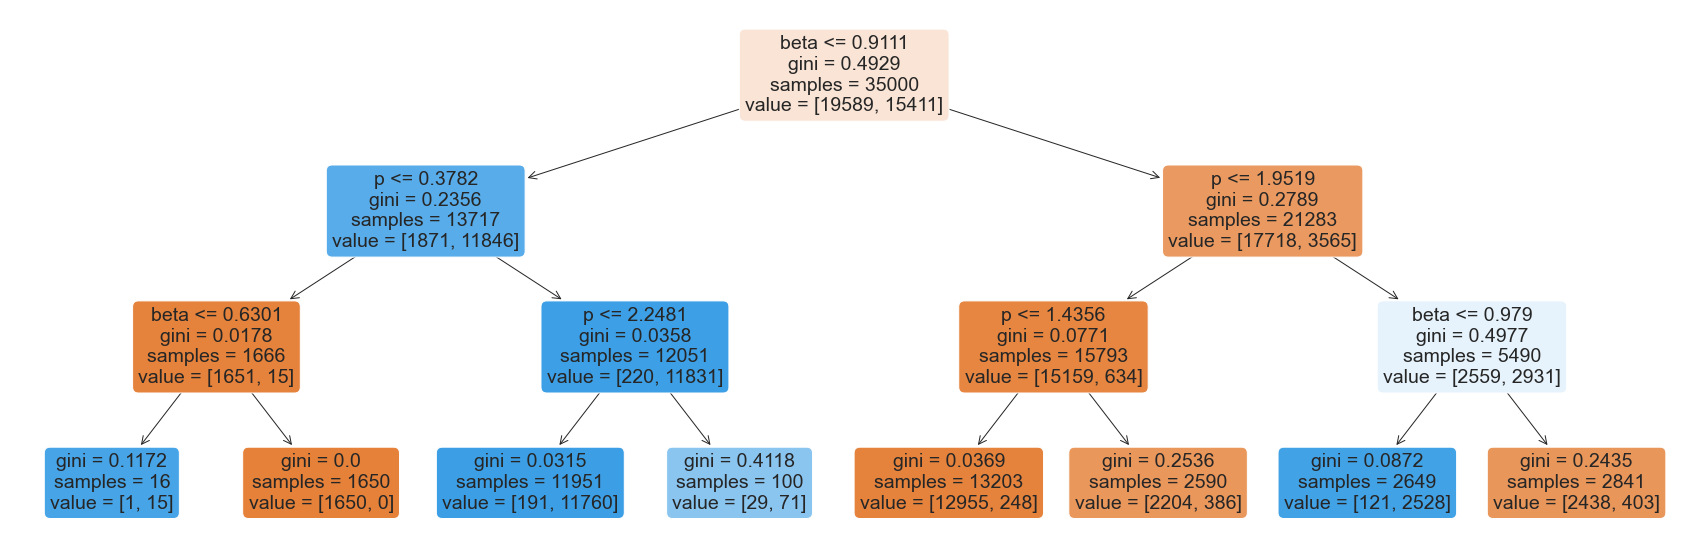

In [79]:
dtree2 = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=5)
t2=dtree2.fit(x_train,y_train)
plt.figure(figsize = (30,10))
diagram= sklearn.tree.plot_tree(t2,feature_names = df.columns,filled = True , precision = 4, rounded = True)

### varying maximum depth

In [80]:
val_acc_max_depth=[]
val_f1_max_depth=[]
train_acc_max_depth=[]
train_f1_max_depth=[]
for i in range(3,21):
    dtree = DecisionTreeClassifier(criterion='gini',max_depth=i,min_samples_leaf=1)
    dtree.fit(x_train,y_train)
    pred_train = dtree.predict(x_train)
    pred_val = dtree.predict(x_val)
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    train_acc_max_depth.append(acc_train)
    train_f1_max_depth.append(f1_train)
    val_acc_max_depth.append(acc_val)
    val_f1_max_depth.append(f1_val)

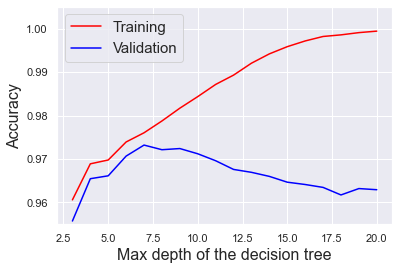

In [81]:
plt.plot(range(3,21),train_acc_max_depth,c='red')
plt.plot(range(3,21),val_acc_max_depth,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xlabel("Max depth of the decision tree", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.955,1.005)
plt.show()

### varying minimum sample leaf

In [82]:
val_acc_min_samples_leaf=[]
val_f1_min_samples_leaf=[]
train_acc_min_samples_leaf=[]
train_f1_min_samples_leaf=[]
for i in range(1,41):
    dtree = DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=i)
    dtree.fit(x_train,y_train)
    pred_train = dtree.predict(x_train)
    pred_val = dtree.predict(x_val)
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    train_acc_min_samples_leaf.append(acc_train)
    train_f1_min_samples_leaf.append(f1_train)
    val_acc_min_samples_leaf.append(acc_val)
    val_f1_min_samples_leaf.append(f1_val)

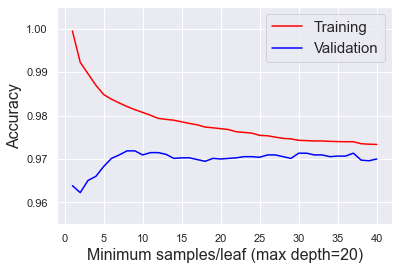

In [83]:
plt.plot(range(1,41),train_acc_min_samples_leaf,c='red')
plt.plot(range(1,41),val_acc_min_samples_leaf,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xlabel("Minimum samples/leaf (max depth=20)", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.955,1.005)
plt.show()

In [84]:
val_acc_min_samples_leaf=[]
val_f1_min_samples_leaf=[]
train_acc_min_samples_leaf=[]
train_f1_min_samples_leaf=[]
for i in range(10,51):
    dtree = DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=i)
    dtree.fit(x_train,y_train)
    pred_train = dtree.predict(x_train)
    pred_val = dtree.predict(x_val)
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    train_acc_min_samples_leaf.append(acc_train)
    train_f1_min_samples_leaf.append(f1_train)
    val_acc_min_samples_leaf.append(acc_val)
    val_f1_min_samples_leaf.append(f1_val)

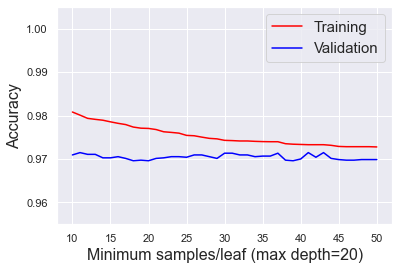

In [85]:
plt.plot(range(10,51),train_acc_min_samples_leaf,c='red')
plt.plot(range(10,51),val_acc_min_samples_leaf,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xlabel("Minimum samples/leaf (max depth=20)", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.955,1.005)
plt.show()

### varying training dataset 

In [86]:
val_acc_train_size=[]
val_f1_train_size=[]
train_acc_train_size=[]
train_f1_train_size=[]
val_range=(10,101,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    percentage=i*0.01
    dtree = DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=20)
    # Sampling
    df_sampled = dt.sample(frac=percentage)
    x_train_sampled=df_sampled.drop('id',axis=1)
    y_train_sampled=df_sampled['id']
    # Fitting and Predictions
    dtree.fit(x_train_sampled,y_train_sampled)
    pred_train = dtree.predict(x_train_sampled)
    pred_val = dtree.predict(x_val)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train_sampled,pred_train)
    f1_train = f1_score(y_train_sampled,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_train_size.append(acc_train)
    train_f1_train_size.append(f1_train)
    val_acc_train_size.append(acc_val)
    val_f1_train_size.append(f1_val)
    if i%10==0:
        print(f"Done for: {i}% training set size")

Done for: 10% training set size
Done for: 20% training set size
Done for: 30% training set size
Done for: 40% training set size
Done for: 50% training set size
Done for: 60% training set size
Done for: 70% training set size
Done for: 80% training set size
Done for: 90% training set size
Done for: 100% training set size


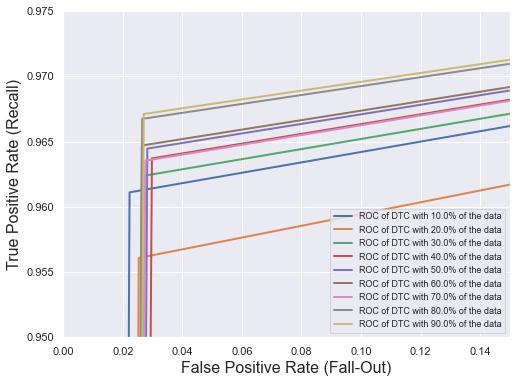

In [88]:
plt.figure(figsize=(8, 6))
for i in range(10,100,10):
    # Fitting
    percentage=i*0.01
    dtree = DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=20)
    # Sampling
    df_sampled = dt.sample(frac=percentage)
    x_train_sampled=df_sampled.drop('id',axis=1)
    y_train_sampled=df_sampled['id']
    # Fitting and Predictions
    dtree.fit(x_train_sampled,y_train_sampled)
    pred_train = dtree.predict(x_train_sampled)
    pred_val = dtree.predict(x_val)
    y_roc = cross_val_predict(dtree, x_train_sampled, y_train_sampled, cv=3)
    fpr_i, tpr_i, thresholds_i = roc_curve(y_train_sampled, y_roc)
    plot_roc_curve(fpr_i, tpr_i,f"ROC of DTC with {percentage*100}% of the data")
    
plt.legend(loc='best',fontsize=9)
plt.xlim(0,0.15)
plt.ylim(0.95,0.975)
plt.show()

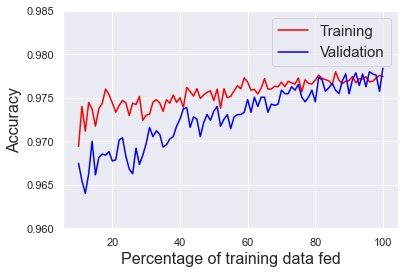

In [89]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.96,0.985)
plt.show()

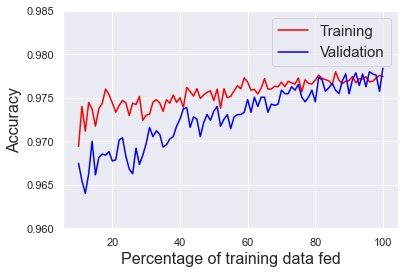

In [90]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_f1_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_f1_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.96,0.985)
plt.show()

## Entropy criterion

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [58]:
DTC=DecisionTreeClassifier(random_state=0,criterion='entropy')
DTC.fit(x_train,y_train)
DTC_pred=DTC.predict(x_test)
DTC_accuracy=accuracy_score(DTC_pred,y_test)
print(DTC_accuracy)
text_pic = tree.export_text(DTC)

0.9642666666666667


In [59]:
from sklearn.model_selection import cross_val_score
cross_val_score(DTC, x, y, cv=3, scoring="accuracy")

array([0.96064079, 0.96526069, 0.96087844])

In [60]:
from sklearn.model_selection import cross_val_predict
y_predDTC = cross_val_predict(DTC, x, y, cv=3)

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_predDTC)

array([[27027,   947],
       [  940, 21086]])

In [62]:
scoreDT1=accuracy_score(y_val,DTC_pred)
print(scoreDT1)
scoreDT2= accuracy_score(y,y_predDTC)
print(scoreDT2)

0.512
0.96226


In [63]:
from sklearn.metrics import precision_score
print(precision_score(y, y_predDTC))

from sklearn.metrics import recall_score
print(recall_score(y, y_predDTC))

from sklearn.metrics import f1_score
print(f1_score(y, y_predDTC))

0.9570190169291517
0.9573231635340053
0.9571710660704964


In [64]:
from sklearn.metrics import roc_curve
fprDTC, tprDTC, thresholdDTC = roc_curve(y, y_predDTC)

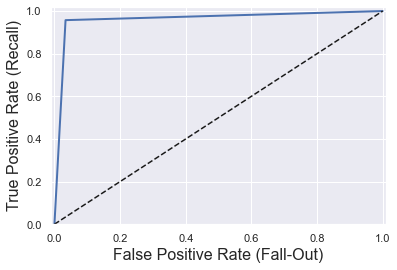

In [65]:
plot_roc_curve(fprDTC,tprDTC)

In [66]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, y_pred)

0.9631643724951405

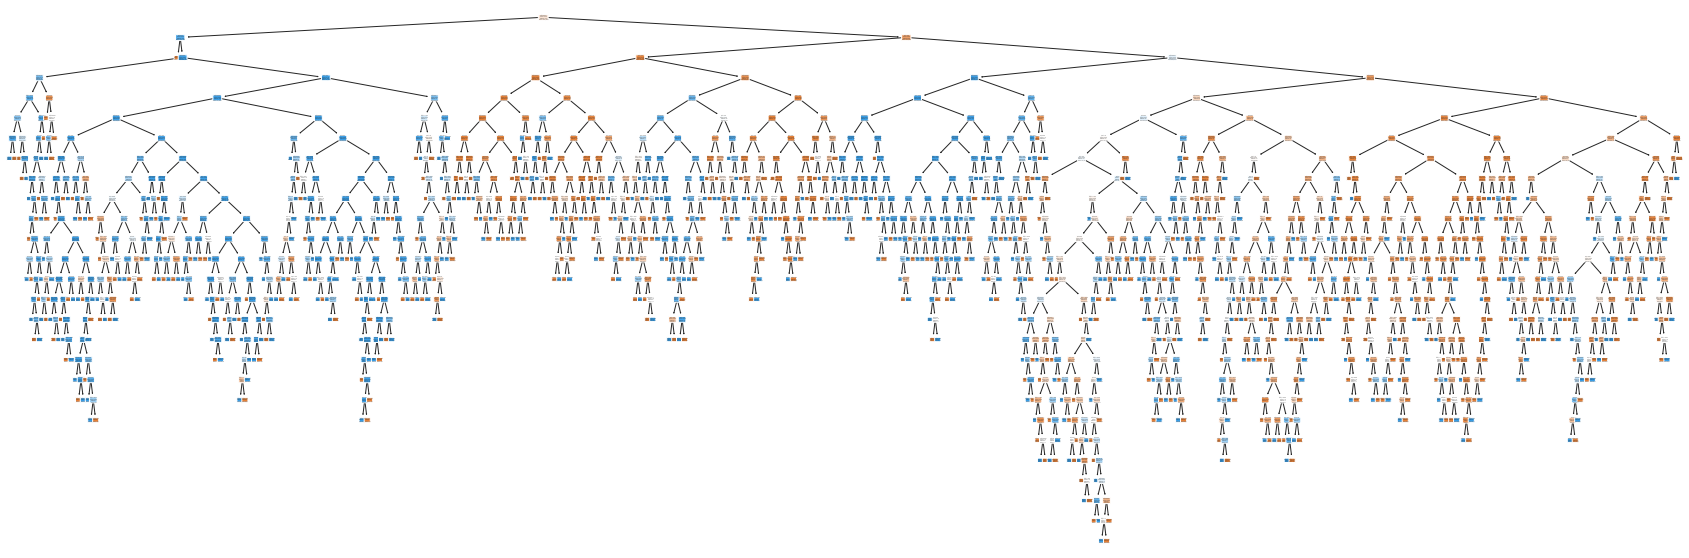

In [67]:
plt.figure(figsize = (30,10))
diagram= sklearn.tree.plot_tree(DTC,feature_names = df.columns,filled = True , precision = 4, rounded = True)

In [102]:
DTC1=DecisionTreeClassifier(random_state=0,max_depth=10,criterion='entropy')
DTC1.fit(x_train,y_train)
DTC1_pred=DTC.predict(x_test)
DTC1_accuracy=accuracy_score(DTC1_pred,y_test)
print(DTC1_accuracy)
text_pic = tree.export_text(DTC1)

0.962


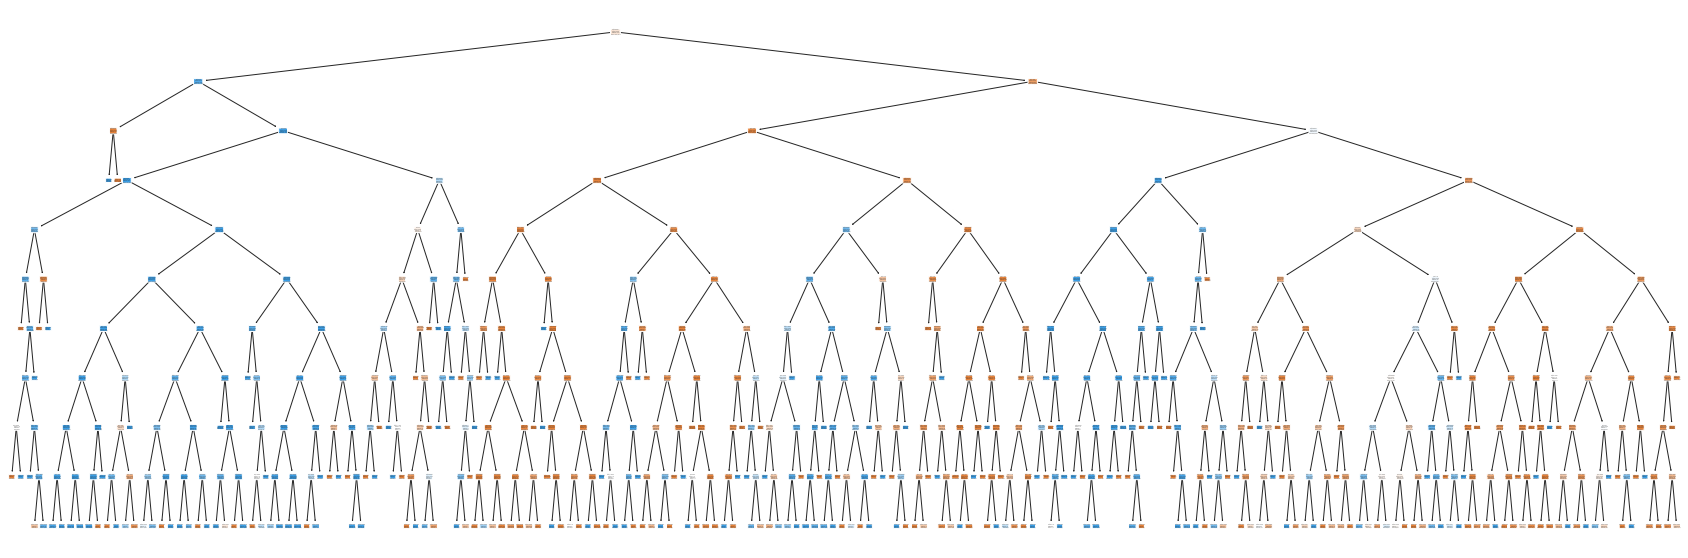

In [103]:
plt.figure(figsize = (30,10))
diagram= sklearn.tree.plot_tree(DTC1,feature_names = df.columns,filled = True , precision = 4, rounded = True)

In [104]:
DTC2=DecisionTreeClassifier(random_state=0,max_depth=3,criterion='entropy')
DTC2.fit(x_train,y_train)
DTC2_pred=DTC.predict(x_test)
DTC2_accuracy=accuracy_score(DTC2_pred,y_test)
print(DTC2_accuracy)
text_pic = tree.export_text(DTC2)

0.962


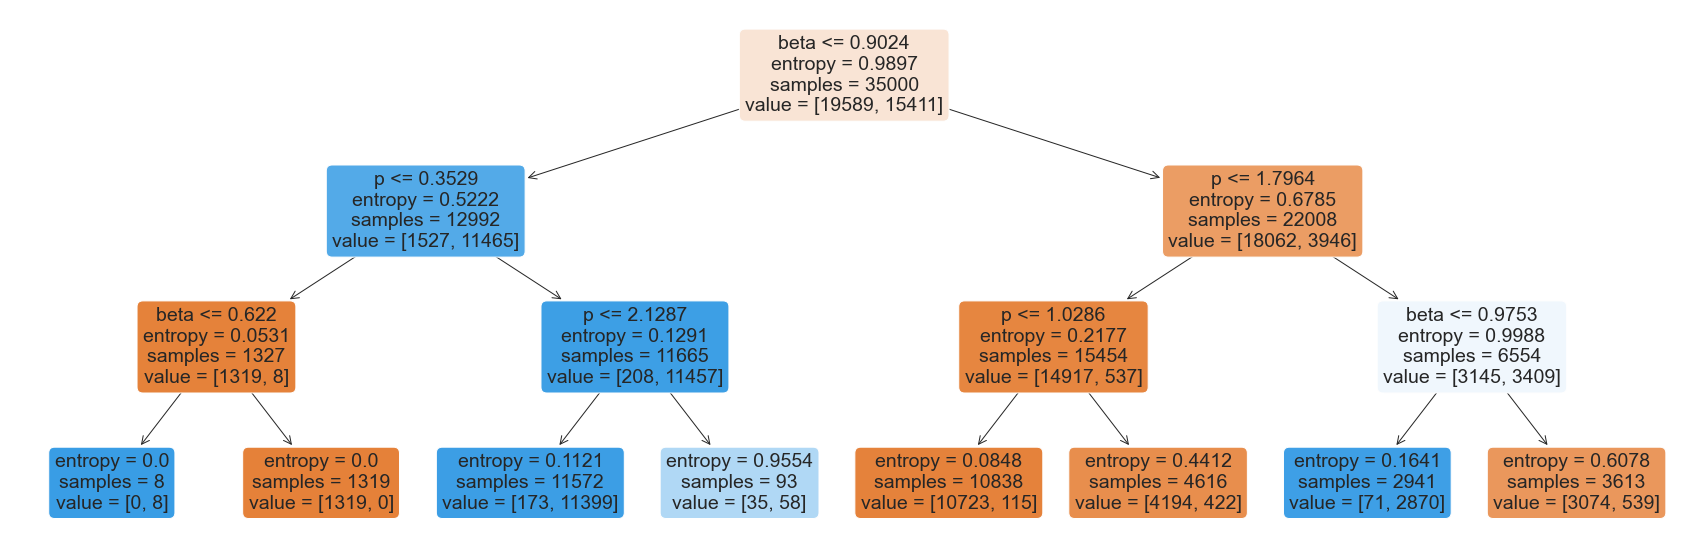

In [105]:
plt.figure(figsize = (30,10))
diagram= sklearn.tree.plot_tree(DTC2,feature_names = df.columns,filled = True , precision = 4, rounded = True)

In [106]:
DTC3=DecisionTreeClassifier(random_state=0,max_depth=4,criterion='entropy')
DTC3.fit(x_train,y_train)
DTC3_pred=DTC.predict(x_test)
DTC3_accuracy=accuracy_score(DTC3_pred,y_test)
print(DTC3_accuracy)
text_pic = tree.export_text(DTC3)

0.962


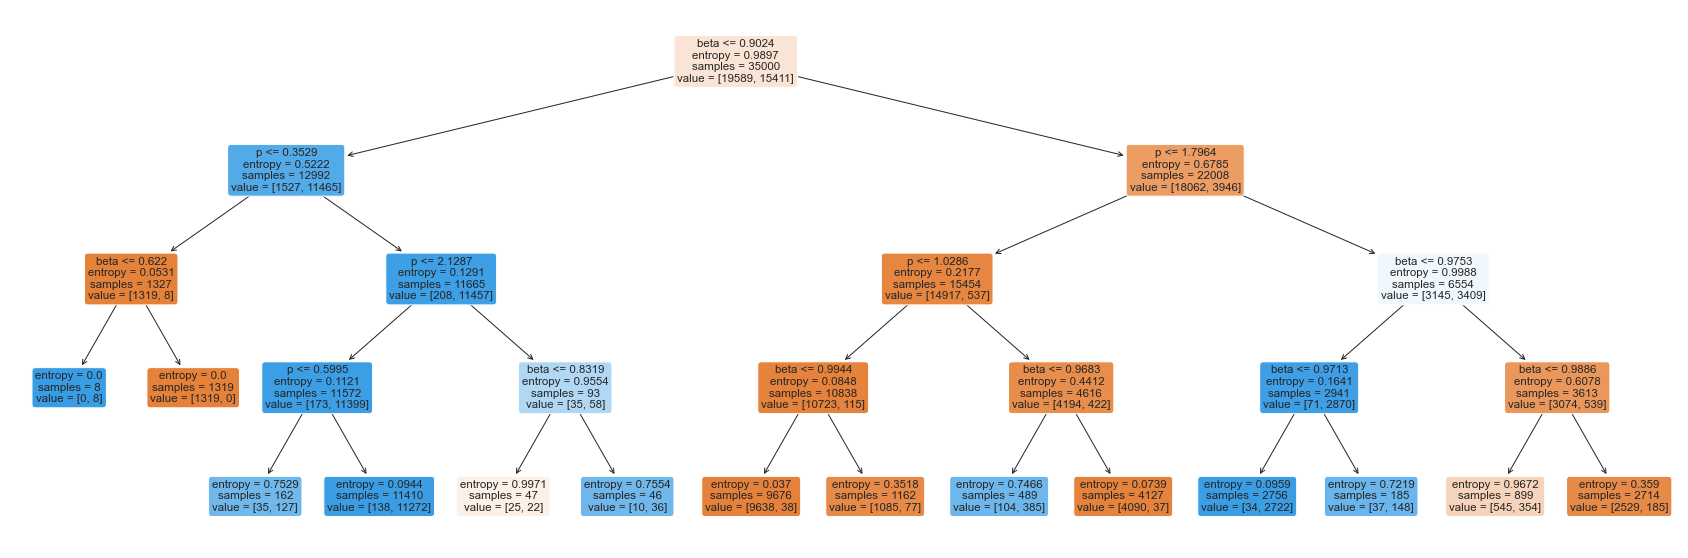

In [107]:
plt.figure(figsize = (30,10))
diagram= sklearn.tree.plot_tree(DTC3,feature_names = df.columns,filled = True , precision = 4, rounded = True)

### varying training data set

In [108]:
val_acc_train_size=[]
val_f1_train_size=[]
train_acc_train_size=[]
train_f1_train_size=[]
val_range=(10,101,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    percentage=i*0.01
    dtree = DecisionTreeClassifier(criterion='entropy',max_depth=20,min_samples_leaf=20)
    # Sampling
    df_sampled = data.sample(frac=percentage)
    x_train_sampled=df_sampled.drop('id',axis=1)
    y_train_sampled=df_sampled['id']
    # Fitting and Predictions
    dtree.fit(x_train_sampled,y_train_sampled)
    pred_train = dtree.predict(x_train_sampled)
    pred_val = dtree.predict(x_val)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train_sampled,pred_train)
    f1_train = f1_score(y_train_sampled,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_train_size.append(acc_train)
    train_f1_train_size.append(f1_train)
    val_acc_train_size.append(acc_val)
    val_f1_train_size.append(f1_val)
    if i%10==0:
        print(f"Done for: {i}% training set size")

Done for: 10% training set size
Done for: 20% training set size
Done for: 30% training set size
Done for: 40% training set size
Done for: 50% training set size
Done for: 60% training set size
Done for: 70% training set size
Done for: 80% training set size
Done for: 90% training set size
Done for: 100% training set size


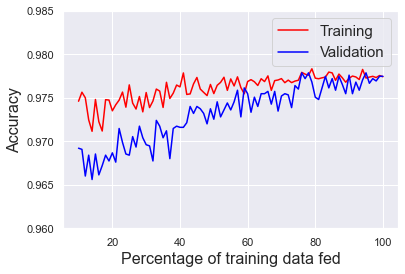

In [109]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.96,0.985)
plt.show()

# Ada boost classifier

In [67]:
from sklearn.ensemble import AdaBoostClassifier

In [68]:
adaboost=AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=2),
                            n_estimators=20,learning_rate=0.01)

In [69]:
adaboost.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=2),
                   learning_rate=0.01, n_estimators=20)

In [70]:
predictions = adaboost.predict(x_val)

In [71]:
scoreAB=accuracy_score(y_val,predictions)
print(scoreAB)

0.9730666666666666


In [72]:
from sklearn.model_selection import cross_val_score
cross_val_score(adaboost, x, y, cv=3, scoring="accuracy")

array([0.96940061, 0.97216056, 0.97083883])

In [73]:
from sklearn.model_selection import cross_val_predict
y_predAB = cross_val_predict(adaboost, x, y, cv=3)

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_predAB)

array([[27233,   741],
       [  680, 21346]])

In [75]:
from sklearn.metrics import precision_score
print(precision_score(y, y_predAB))

from sklearn.metrics import recall_score
print(recall_score(y, y_predAB))

from sklearn.metrics import f1_score
print(f1_score(y, y_predAB))

0.9664508534432019
0.96912739489694
0.9677872735928186


In [76]:
y_scoresAB = cross_val_predict(adaboost, x, y, cv=3,
                             method="decision_function")

In [77]:
from sklearn.metrics import roc_curve
fprAB, tprAB, thresholdsAB = roc_curve(y, y_scoresAB)

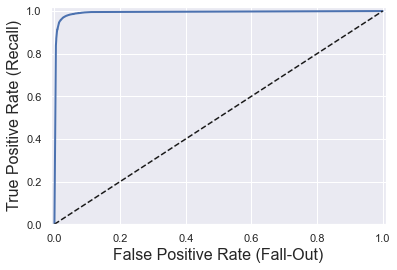

In [78]:
plot_roc_curve(fprAB,tprAB)

In [79]:
roc_auc_score(y, y_scoresAB)

0.9930104490990327

## varying number of estimators

In [123]:
import time
val_acc_num_trees=[]
val_f1_num_trees=[]
train_acc_num_trees=[]
train_f1_num_trees=[]
time_adaboost=[]
val_range=(1,53,3)
for i in range(val_range[0],val_range[1],val_range[2]):
    t1=time.time()
    # Fitting
    adaboost=AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=20,max_depth=20),
                            n_estimators=i,learning_rate=0.2)
    adaboost.fit(x_train,y_train)
    pred_train = adaboost.predict(x_train)
    pred_val = adaboost.predict(x_val)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_num_trees.append(acc_train)
    train_f1_num_trees.append(f1_train)
    val_acc_num_trees.append(acc_val)
    val_f1_num_trees.append(f1_val)
    t2=time.time()
    time_adaboost.append(t2-t1)
    print(f"Done for number of trees: {i}")

Done for number of trees: 1
Done for number of trees: 4
Done for number of trees: 7
Done for number of trees: 10
Done for number of trees: 13
Done for number of trees: 16
Done for number of trees: 19
Done for number of trees: 22
Done for number of trees: 25
Done for number of trees: 28
Done for number of trees: 31
Done for number of trees: 34
Done for number of trees: 37
Done for number of trees: 40
Done for number of trees: 43
Done for number of trees: 46
Done for number of trees: 49
Done for number of trees: 52


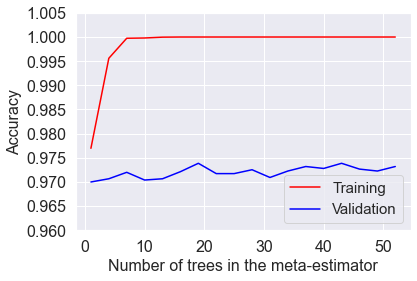

In [124]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_num_trees,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_num_trees,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Number of trees in the meta-estimator", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.96,1.005)
plt.show()

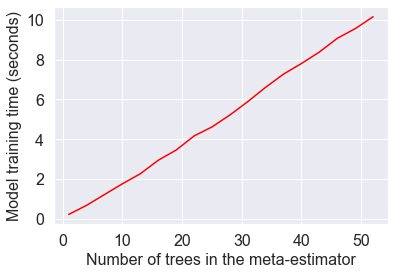

In [125]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),time_adaboost,c='red')
#plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_num_trees,c='blue')
#plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Number of trees in the meta-estimator", fontsize=16)
plt.ylabel("Model training time (seconds)",fontsize=16)
#plt.ylim(0.7,1.05)
plt.show()

### varying the learning rate

In [126]:
val_acc_lr=[]
val_f1_lr=[]
train_acc_lr=[]
train_f1_lr=[]
val_range=(1,21,1)
lr_range=[]
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    lr=0.1*i
    lr_range.append(lr)
    adaboost = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=20,max_depth=2),
                            n_estimators=100,learning_rate=lr)
    adaboost.fit(x_train,y_train)
    pred_train = adaboost.predict(x_train)
    pred_val = adaboost.predict(x_val)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_lr.append(acc_train)
    train_f1_lr.append(f1_train)
    val_acc_lr.append(acc_val)
    val_f1_lr.append(f1_val)
    print(f"Done for learning rate: {lr}")

Done for learning rate: 0.1
Done for learning rate: 0.2
Done for learning rate: 0.30000000000000004
Done for learning rate: 0.4
Done for learning rate: 0.5
Done for learning rate: 0.6000000000000001
Done for learning rate: 0.7000000000000001
Done for learning rate: 0.8
Done for learning rate: 0.9
Done for learning rate: 1.0
Done for learning rate: 1.1
Done for learning rate: 1.2000000000000002
Done for learning rate: 1.3
Done for learning rate: 1.4000000000000001
Done for learning rate: 1.5
Done for learning rate: 1.6
Done for learning rate: 1.7000000000000002
Done for learning rate: 1.8
Done for learning rate: 1.9000000000000001
Done for learning rate: 2.0


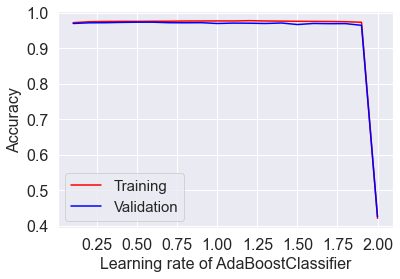

In [127]:
plt.plot(lr_range,train_acc_lr,c='red')
plt.plot(lr_range,val_acc_lr,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Learning rate of AdaBoostClassifier", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.7,1.05)
plt.show()

## varying training data set

In [128]:
val_acc_train_size=[]
val_f1_train_size=[]
train_acc_train_size=[]
train_f1_train_size=[]
val_range=(10,101,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Model
    percentage=i*0.01
    adaboost = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=20,max_depth=20),
                            n_estimators=20,learning_rate=0.2)
    # Sampling
    df_sampled = dt.sample(frac=percentage)
    x_train_sampled=df_sampled.drop('id',axis=1)
    y_train_sampled=df_sampled['id']
    # Fitting and prediction
    adaboost.fit(x_train_sampled,y_train_sampled)
    pred_train = adaboost.predict(x_train_sampled)
    pred_val = adaboost.predict(x_val)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train_sampled,pred_train)
    f1_train = f1_score(y_train_sampled,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_train_size.append(acc_train)
    train_f1_train_size.append(f1_train)
    val_acc_train_size.append(acc_val)
    val_f1_train_size.append(f1_val)
    
    if i%10==0:
        print(f"Done for: {i}% training set size")

Done for: 10% training set size
Done for: 20% training set size
Done for: 30% training set size
Done for: 40% training set size
Done for: 50% training set size
Done for: 60% training set size
Done for: 70% training set size
Done for: 80% training set size
Done for: 90% training set size
Done for: 100% training set size


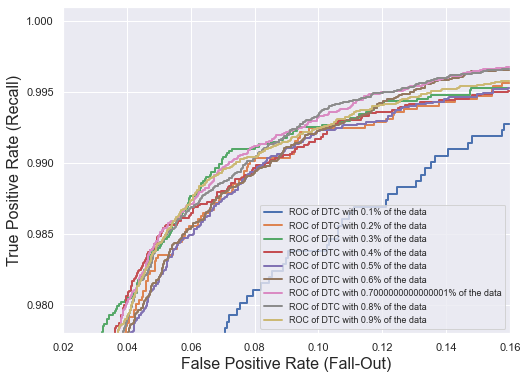

In [131]:
plt.figure(figsize=(8, 6))
for j in range(10,100,10):
    # Fitting
    percentage=j*0.01
    aboo = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=20,max_depth=20),
                            n_estimators=20,learning_rate=0.2)
    # Sampling
    df_sampled = dt.sample(frac=percentage)
    x_train_sampled=df_sampled.drop('id',axis=1)
    y_train_sampled=df_sampled['id']
    # Fitting and Predictions
    aboo.fit(x_train_sampled,y_train_sampled)    
    pred_train = aboo.predict(x_train_sampled)
    pred_val = aboo.predict(x_val)
    y_rocAB = cross_val_predict(aboo, x_train_sampled, y_train_sampled, cv=3,method="decision_function")
    fpr_j, tpr_j, thresholds_j = roc_curve(y_train_sampled, y_rocAB)
    plot_roc_curve(fpr_j, tpr_j,f"ROC of DTC with {percentage}% of the data")
    
plt.legend(loc='best',fontsize=9)
plt.xlim(0.02,0.16)
plt.ylim(0.978,1.001)
plt.show()

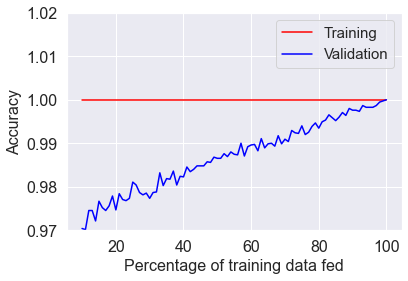

In [132]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.97,1.02)
plt.show()

# Logistic regression

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [81]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
LR_pred=LR.predict(x_test)
LR_accuracy=accuracy_score(LR_pred,y_test)
print(LR_accuracy)

0.9456


In [82]:
from sklearn.model_selection import cross_val_score
cross_val_score(LR, x, y, cv=3, scoring="accuracy")

array([0.94660107, 0.94888102, 0.94851794])

In [83]:
from sklearn.model_selection import cross_val_predict
y_predLR = cross_val_predict(LR, x, y, cv=3)

In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_predLR)

array([[26900,  1074],
       [ 1526, 20500]])

In [85]:
from sklearn.metrics import precision_score
print(precision_score(y, y_predLR))

from sklearn.metrics import recall_score
print(recall_score(y, y_predLR))

from sklearn.metrics import f1_score
print(f1_score(y, y_predLR))

0.9502178548252527
0.9307182420775447
0.9403669724770641


In [86]:
y_scoresLR = cross_val_predict(LR, x, y, cv=3,
                             method="decision_function")

In [87]:
from sklearn.metrics import roc_curve
fprLR, tprLR, thresholdsLR = roc_curve(y, y_scoresLR)

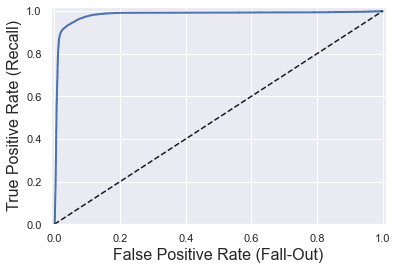

In [88]:
plot_roc_curve(fprLR,tprLR)

### varying training data set

In [142]:
val_acc_train_size=[]
val_f1_train_size=[]
train_acc_train_size=[]
train_f1_train_size=[]
val_range=(10,101,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Model
    percentage=i*0.01
    LR=LogisticRegression()
    
    # Sampling
    df_sampled = dt.sample(frac=percentage)
    x_train_sampled=df_sampled.drop('id',axis=1)
    y_train_sampled=df_sampled['id']
    # Fitting and prediction
    LR.fit(x_train_sampled,y_train_sampled)
    pred_train = LR.predict(x_train_sampled)
    pred_val = LR.predict(x_val)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train_sampled,pred_train)
    f1_train = f1_score(y_train_sampled,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_train_size.append(acc_train)
    train_f1_train_size.append(f1_train)
    val_acc_train_size.append(acc_val)
    val_f1_train_size.append(f1_val)
    
    if i%10==0:
        print(f"Done for: {i}% training set size")

Done for: 10% training set size
Done for: 20% training set size
Done for: 30% training set size
Done for: 40% training set size
Done for: 50% training set size
Done for: 60% training set size
Done for: 70% training set size
Done for: 80% training set size
Done for: 90% training set size
Done for: 100% training set size


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


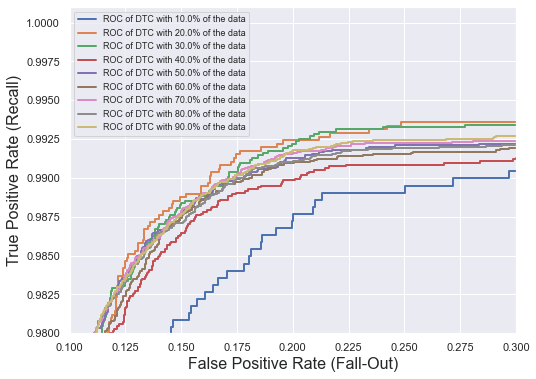

In [143]:
plt.figure(figsize=(8, 6))
for j in range(10,100,10):
    # Fitting
    percentage=j*0.01
    LR=LogisticRegression()
    
    # Sampling
    df_sampled = dt.sample(frac=percentage)
    x_train_sampled=df_sampled.drop('id',axis=1)
    y_train_sampled=df_sampled['id']
    # Fitting and Predictions
    LR.fit(x_train_sampled,y_train_sampled)
    pred_train = LR.predict(x_train_sampled)
    pred_val = LR.predict(x_val)
    y_rocAB = cross_val_predict(LR, x_train_sampled, y_train_sampled, cv=3,method="decision_function")
    fpr_j, tpr_j, thresholds_j = roc_curve(y_train_sampled, y_rocAB)
    plot_roc_curve(fpr_j, tpr_j,f"ROC of DTC with {percentage*100}% of the data")
    
plt.legend(loc='best',fontsize=9)
plt.xlim(0.1,0.3)
plt.ylim(0.98,1.001)
plt.show()

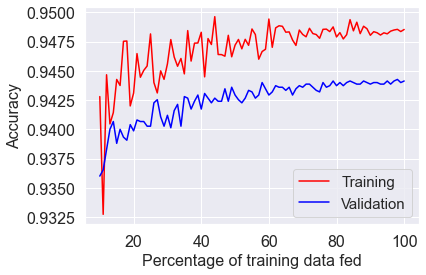

In [144]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.97,1.02)
plt.show()

# K neighbors classifier

In [89]:
from sklearn.preprocessing import StandardScaler
x_train_scaled=StandardScaler().fit_transform(x_train)
x_val_scaled=StandardScaler().fit_transform(x_val)
x_test_scaled=StandardScaler().fit_transform(x_test)

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(3)

In [91]:
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [92]:
predictions=knn.predict(x_val_scaled)

In [93]:
scoreknn=accuracy_score(y_val,predictions)
print(scoreknn)

0.9610666666666666


In [94]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn, x, y, cv=3, scoring="accuracy")

array([0.94648107, 0.94672107, 0.94467779])

In [95]:
from sklearn.model_selection import cross_val_predict

y_predknn = cross_val_predict(knn, x, y, cv=3)

In [96]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_predknn)

array([[26759,  1215],
       [ 1487, 20539]])

In [97]:
from sklearn.metrics import precision_score
print(precision_score(y, y_predknn))

from sklearn.metrics import recall_score
print(recall_score(y, y_predknn))

from sklearn.metrics import f1_score
print(f1_score(y, y_predknn))

0.9441482026294015
0.9324888767819849
0.938282320694381


In [98]:
y_scoresknn = cross_val_predict(knn, x, y, cv=3,
                             method="predict_proba") 

In [99]:
from sklearn.metrics import roc_curve
fprknn, tprknn, thresholdsknn = roc_curve(y, y_scoresknn[:,1])

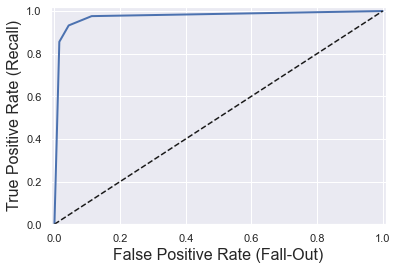

In [100]:
plot_roc_curve(fprknn,tprknn)

### varying numebr of neighbors

In [157]:
val_acc_k=[]
val_f1_k=[]
train_acc_k=[]
train_f1_k=[]
val_range=(1,21,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    knn=KNeighborsClassifier(i)
    knn.fit(x_train_scaled,y_train)
    pred_train = knn.predict(x_train_scaled)
    pred_val = knn.predict(x_val_scaled)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_k.append(acc_train)
    train_f1_k.append(f1_train)
    val_acc_k.append(acc_val)
    val_f1_k.append(f1_val)
    print(f"Done for number of neighbors: {i}")

Done for number of neighbors: 1
Done for number of neighbors: 2
Done for number of neighbors: 3
Done for number of neighbors: 4
Done for number of neighbors: 5
Done for number of neighbors: 6
Done for number of neighbors: 7
Done for number of neighbors: 8
Done for number of neighbors: 9
Done for number of neighbors: 10
Done for number of neighbors: 11
Done for number of neighbors: 12
Done for number of neighbors: 13
Done for number of neighbors: 14
Done for number of neighbors: 15
Done for number of neighbors: 16
Done for number of neighbors: 17
Done for number of neighbors: 18
Done for number of neighbors: 19
Done for number of neighbors: 20


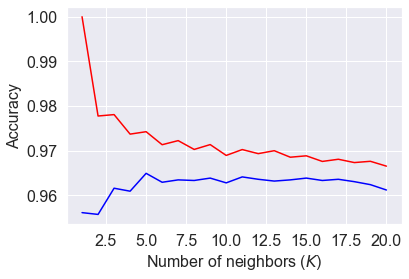

In [158]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_k,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_k,c='blue')
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Number of neighbors ($K$)", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.81,0.85)
plt.show()

### varying training data set

In [159]:
val_acc_train_size=[]
val_f1_train_size=[]
train_acc_train_size=[]
train_f1_train_size=[]
val_range=(10,101,5)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    percentage=i*0.01
    knn=KNeighborsClassifier(5)
   # Sampling
    df_sampled = data.sample(frac=percentage)
    x_train_sampled=df_sampled.drop('id',axis=1)
    y_train_sampled=df_sampled['id']
    x_train_sampled=StandardScaler().fit_transform(x_train_sampled)
    # Fitting and prediction
    knn.fit(x_train_sampled,y_train_sampled)
    pred_train = knn.predict(x_train_sampled)
    pred_val = knn.predict(x_val_scaled)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train_sampled,pred_train)
    f1_train = f1_score(y_train_sampled,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_train_size.append(acc_train)
    train_f1_train_size.append(f1_train)
    val_acc_train_size.append(acc_val)
    val_f1_train_size.append(f1_val)
    
    if i%10==0:
        print(f"Done for: {i}% training set size")

Done for: 10% training set size
Done for: 20% training set size
Done for: 30% training set size
Done for: 40% training set size
Done for: 50% training set size
Done for: 60% training set size
Done for: 70% training set size
Done for: 80% training set size
Done for: 90% training set size
Done for: 100% training set size


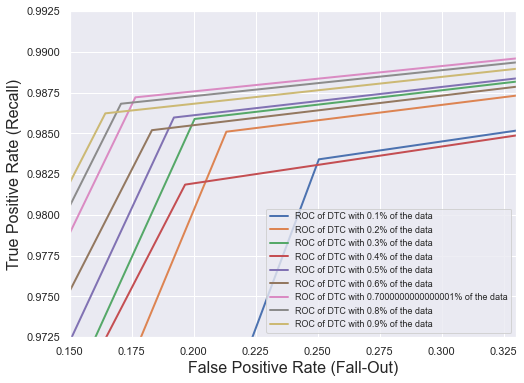

In [167]:
plt.figure(figsize=(8, 6))
for q in range(10,100,10):
    # Fitting
    percentage=q*0.01
    knn=KNeighborsClassifier(5)
    # Sampling
    df_sampled = dt.sample(frac=percentage)
    x_train_sampled=df_sampled.drop('id',axis=1)
    y_train_sampled=df_sampled['id']
    # Fitting and Predictions
    knn.fit(x_train_sampled,y_train_sampled)
    pred_train = knn.predict(x_train_sampled)
    pred_val = knn.predict(x_val)
    y_rocknn = cross_val_predict(knn, x_train_sampled, y_train_sampled, cv=3,method="predict_proba")
    fpr_q, tpr_q, thresholds_q = roc_curve(y_train_sampled, y_rocknn[:,1])
    plot_roc_curve(fpr_q, tpr_q,f"ROC of DTC with {percentage}% of the data")
    
plt.legend(loc='best',fontsize=9)
plt.xlim(0.15,0.33)
plt.ylim(0.9725,0.9925)
plt.show()

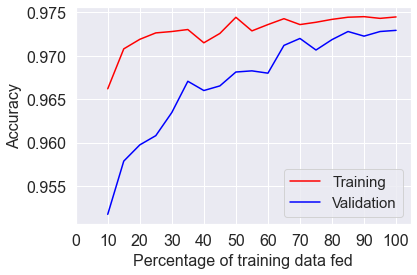

In [168]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(np.arange(0, 110, step=10),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.7,0.9)
#plt.xlim(0,110)
plt.show()

# SGD classifier

In [101]:
from sklearn.linear_model import SGDClassifier

SGDC = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
SGDC.fit(x_train, y_train)

SGDClassifier(random_state=42)

In [102]:
predictionSGDC=SGDC.predict(x_val)

In [103]:
scoreSGDC=accuracy_score(y_val,predictionSGDC)
print(scoreSGDC)

0.9397333333333333


In [104]:
from sklearn.model_selection import cross_val_score
cross_val_score(SGDC, x, y, cv=3, scoring="accuracy")

array([0.94228115, 0.94624108, 0.94341774])

In [105]:
from sklearn.model_selection import cross_val_predict

y_predSGDC = cross_val_predict(SGDC, x, y, cv=3)

In [106]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_predSGDC)

array([[27102,   872],
       [ 1929, 20097]])

In [107]:
from sklearn.metrics import precision_score
print(precision_score(y, y_predSGDC))

from sklearn.metrics import recall_score
print(recall_score(y, y_predSGDC))

from sklearn.metrics import f1_score
print(f1_score(y, y_predSGDC))

0.9584148028041395
0.9124216834649959
0.9348528898709152


In [108]:
y_scoresSGDC = cross_val_predict(SGDC, x, y, cv=3,
                             method="decision_function")

In [109]:
from sklearn.metrics import roc_curve
fprSGDC, tprSGDC, thresholdsSGDC = roc_curve(y, y_scoresSGDC)

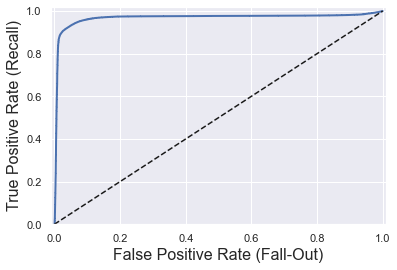

In [110]:
plot_roc_curve(fprSGDC,tprSGDC)

In [149]:
val_acc_train_size=[]
val_f1_train_size=[]
train_acc_train_size=[]
train_f1_train_size=[]
val_range=(10,101,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Model
    percentage=i*0.01
    SGDC = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
    
    # Sampling
    df_sampled = dt.sample(frac=percentage)
    x_train_sampled=df_sampled.drop('id',axis=1)
    y_train_sampled=df_sampled['id']
    # Fitting and prediction
    SGDC.fit(x_train_sampled,y_train_sampled)
    pred_train = SGDC.predict(x_train_sampled)
    pred_val = SGDC.predict(x_val)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train_sampled,pred_train)
    f1_train = f1_score(y_train_sampled,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_train_size.append(acc_train)
    train_f1_train_size.append(f1_train)
    val_acc_train_size.append(acc_val)
    val_f1_train_size.append(f1_val)
    
    if i%10==0:
        print(f"Done for: {i}% training set size")

Done for: 10% training set size
Done for: 20% training set size
Done for: 30% training set size
Done for: 40% training set size
Done for: 50% training set size
Done for: 60% training set size
Done for: 70% training set size
Done for: 80% training set size
Done for: 90% training set size
Done for: 100% training set size


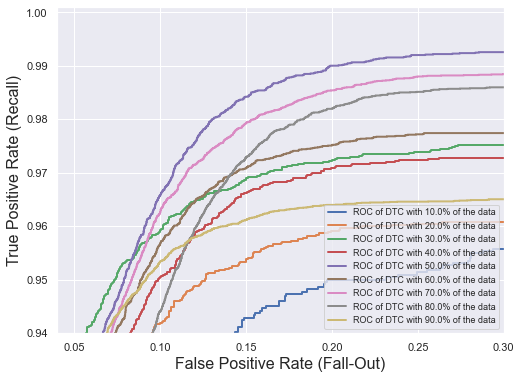

In [154]:
plt.figure(figsize=(8, 6))
for j in range(10,100,10):
    # Fitting
    percentage=j*0.01
    SGDC = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
    
    # Sampling
    df_sampled = dt.sample(frac=percentage)
    x_train_sampled=df_sampled.drop('id',axis=1)
    y_train_sampled=df_sampled['id']
    # Fitting and Predictions
    SGDC.fit(x_train_sampled,y_train_sampled)
    pred_train = SGDC.predict(x_train_sampled)
    pred_val = SGDC.predict(x_val)
    y_rocRFC = cross_val_predict(SGDC, x_train_sampled, y_train_sampled, cv=3,method="decision_function")
    fpr_j, tpr_j, thresholds_j = roc_curve(y_train_sampled, y_rocRFC)
    plot_roc_curve(fpr_j, tpr_j,f"ROC of DTC with {percentage*100}% of the data")
    
plt.legend(loc='best',fontsize=9)
plt.xlim(0.04,0.3)
plt.ylim(0.94,1.001)
plt.show()

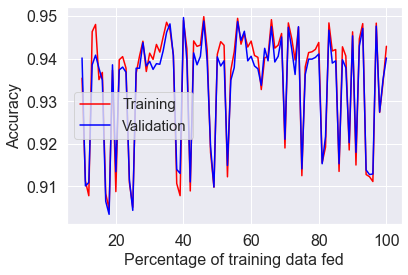

In [155]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.97,1.02)
plt.show()

# Random forest classifier

In [124]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=200,criterion='entropy',random_state=0)

In [125]:
from sklearn.metrics import accuracy_score
RFC.fit(x_train,y_train)
RFC_pred=RFC.predict(x_test)
RFC_accuracy=accuracy_score(RFC_pred,y_test)
print(RFC_accuracy)

0.9734666666666667


In [113]:
from sklearn.model_selection import cross_val_score
cross_val_score(RFC, x, y, cv=3, scoring="accuracy")

array([0.97372053, 0.97564049, 0.975099  ])

In [114]:
from sklearn.model_selection import cross_val_predict

y_predRFC = cross_val_predict(RFC, x, y, cv=3)

In [115]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_predRFC)

array([[27362,   612],
       [  647, 21379]])

In [116]:
from sklearn.metrics import precision_score
print(precision_score(y, y_predRFC))

from sklearn.metrics import recall_score
print(recall_score(y, y_predRFC))

from sklearn.metrics import f1_score
print(f1_score(y, y_predRFC))

0.9721704333591015
0.9706256242622355
0.9713974146352545


In [117]:
y_scoresRFC = cross_val_predict(RFC, x, y, cv=3,
                             method="predict_proba")

In [118]:
y_scoresRFC

array([[0.995, 0.005],
       [0.995, 0.005],
       [0.   , 1.   ],
       ...,
       [0.855, 0.145],
       [1.   , 0.   ],
       [0.98 , 0.02 ]])

In [119]:
from sklearn.metrics import roc_curve
fprRFC, tprRFC, thresholdsRFC = roc_curve(y, y_scoresRFC[:,1])

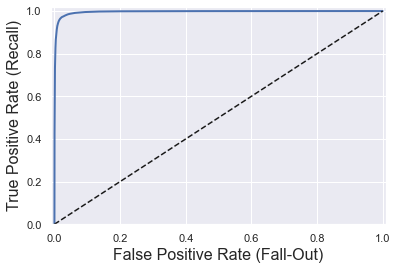

In [120]:
plot_roc_curve(fprRFC,tprRFC)

In [121]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, y_predRFC)

0.9743740833114996

In [143]:
val_acc_train_size=[]
val_f1_train_size=[]
train_acc_train_size=[]
train_f1_train_size=[]
val_range=(10,101,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Model
    percentage=i*0.01
    RFC=RandomForestClassifier(n_estimators=200,criterion='entropy',random_state=0)
    
    # Sampling
    df_sampled = dt.sample(frac=percentage)
    x_train_sampled=df_sampled.drop('id',axis=1)
    y_train_sampled=df_sampled['id']
    # Fitting and prediction
    RFC.fit(x_train_sampled,y_train_sampled)
    pred_train = RFC.predict(x_train_sampled)
    pred_val = RFC.predict(x_val)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train_sampled,pred_train)
    f1_train = f1_score(y_train_sampled,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_train_size.append(acc_train)
    train_f1_train_size.append(f1_train)
    val_acc_train_size.append(acc_val)
    val_f1_train_size.append(f1_val)
    
    if i%10==0:
        print(f"Done for: {i}% training set size")

Done for: 10% training set size
Done for: 20% training set size
Done for: 30% training set size
Done for: 40% training set size
Done for: 50% training set size
Done for: 60% training set size
Done for: 70% training set size
Done for: 80% training set size
Done for: 90% training set size
Done for: 100% training set size


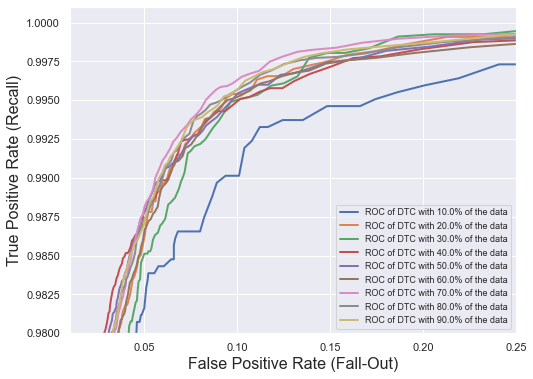

In [148]:
plt.figure(figsize=(8, 6))
for j in range(10,100,10):
    # Fitting
    percentage=j*0.01
    RFC=RandomForestClassifier(n_estimators=200,criterion='entropy',random_state=0)
    
    # Sampling
    df_sampled = dt.sample(frac=percentage)
    x_train_sampled=df_sampled.drop('id',axis=1)
    y_train_sampled=df_sampled['id']
    # Fitting and Predictions
    RFC.fit(x_train_sampled,y_train_sampled)
    pred_train = RFC.predict(x_train_sampled)
    pred_val = RFC.predict(x_val)
    y_rocRFC = cross_val_predict(RFC, x_train_sampled, y_train_sampled, cv=3,method="predict_proba")
    fpr_j, tpr_j, thresholds_j = roc_curve(y_train_sampled, y_rocRFC[:,1])
    plot_roc_curve(fpr_j, tpr_j,f"ROC of DTC with {percentage*100}% of the data")
    
plt.legend(loc='best',fontsize=9)
plt.xlim(0.01,0.25)
plt.ylim(0.98,1.001)
plt.show()

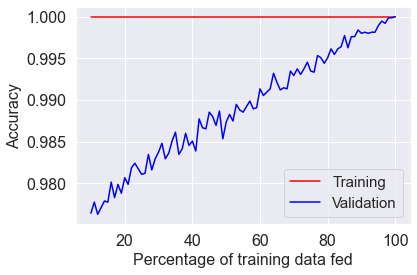

In [144]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.97,1.02)
plt.show()

In [156]:
accuracyscore=[]
accuracyscore_f1=[]
timing=[]

In [157]:
%%time
from sklearn.tree import DecisionTreeClassifier
dtree0 = DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=10)
dtree0.fit(x_train,y_train)
predictions0 = dtree0.predict(x_test)
score_dt0=accuracy_score(y_test,predictions0)
accuracyscore.append(score_dt0)
acc_score_f1=f1_score(y, y_pred)
accuracyscore_f1.append(acc_score_f1)
print(score_dt0)

0.9716
CPU times: user 199 ms, sys: 4.09 ms, total: 203 ms
Wall time: 201 ms


In [158]:
%%time
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier(criterion='entropy',max_depth=20,min_samples_leaf=10)
dtree1.fit(x_train,y_train)
predictions1 = dtree1.predict(x_test)
score_dt1=accuracy_score(y_test,predictions1)
accuracyscore.append(score_dt1)
acc_score_f1_DTC=f1_score(y, y_predDTC)
accuracyscore_f1.append(acc_score_f1_DTC)
print(score_dt1)

0.9704
CPU times: user 194 ms, sys: 2.13 ms, total: 196 ms
Wall time: 195 ms


In [159]:
%%time
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=20,max_depth=2),
                            n_estimators=80,learning_rate=0.5)
adaboost.fit(x_train,y_train)
predictionsAB = adaboost.predict(x_test)
score_adaboost=accuracy_score(y_test,predictionsAB)
accuracyscore.append(score_adaboost)
acc_score_f1_AB=f1_score(y, y_predAB)
accuracyscore_f1.append(acc_score_f1_AB)
print(score_adaboost)

0.9744
CPU times: user 2.75 s, sys: 9.8 ms, total: 2.76 s
Wall time: 2.76 s


In [160]:
%%time
#from sklearn import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predictionsLR = LR.predict(x_test)
score_LR=accuracy_score(y_test,predictionsLR)
accuracyscore.append(score_LR)
acc_score_f1_LR=f1_score(y, y_predLR)
accuracyscore_f1.append(acc_score_f1_LR)
print(score_LR)

0.9437333333333333
CPU times: user 385 ms, sys: 60.7 ms, total: 446 ms
Wall time: 116 ms


In [161]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(3)
knn.fit(x_train_scaled,y_train)
predictionsknn = knn.predict(x_test_scaled)
score_KNN=accuracy_score(y_test,predictionsknn)
accuracyscore.append(score_KNN)
acc_score_f1_knn=f1_score(y, y_predknn)
accuracyscore_f1.append(acc_score_f1_knn)
print(score_KNN)

0.9633333333333334
CPU times: user 365 ms, sys: 2.68 ms, total: 368 ms
Wall time: 367 ms


In [162]:
%%time
from sklearn.linear_model import SGDClassifier
SGDC = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
SGDC.fit(x_train, y_train)
predictionsSGDC = SGDC.predict(x_test)   
score_SGDC=accuracy_score(y_test,predictionsSGDC)
accuracyscore.append(score_SGDC)
acc_score_f1_SGDC=f1_score(y, y_predSGDC)
accuracyscore_f1.append(acc_score_f1_SGDC)
print(score_SGDC)

0.9458666666666666
CPU times: user 169 ms, sys: 11.5 ms, total: 180 ms
Wall time: 129 ms


In [163]:
%%time
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=200,criterion='entropy',random_state=0)
RFC.fit(x_train, y_train)
predictionsRFC = RFC.predict(x_test)  
score_RFC=accuracy_score(y_test,predictionsRFC)
accuracyscore.append(score_RFC)
acc_score_f1_RFC=f1_score(y, y_predRFC)
accuracyscore_f1.append(acc_score_f1_RFC)
print(score_RFC)

0.9752
CPU times: user 8.77 s, sys: 33.5 ms, total: 8.81 s
Wall time: 8.81 s


In [164]:
accuracyscore

[0.9716,
 0.9704,
 0.9744,
 0.9437333333333333,
 0.9633333333333334,
 0.9458666666666666,
 0.9752]

In [165]:
accuracy=np.array(accuracyscore)
accur=np.array(accuracyscore_f1)

In [166]:
accuracy

array([0.9716    , 0.9704    , 0.9744    , 0.94373333, 0.96333333,
       0.94586667, 0.9752    ])

In [167]:
accur

array([0.95809144, 0.95717107, 0.96727701, 0.94036697, 0.93828232,
       0.93485289, 0.97139741])

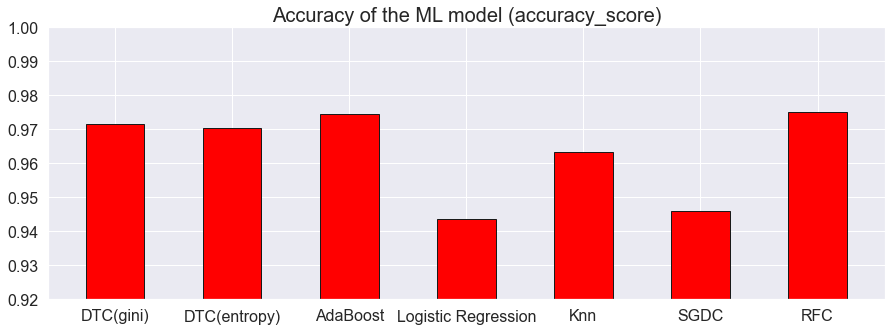

In [168]:
plt.figure(figsize=(15,5))
plt.title("Accuracy of the ML model (accuracy_score)",fontsize=20)
plt.bar(x=['DTC(gini)','DTC(entropy)','AdaBoost','Logistic Regression','Knn','SGDC',"RFC"],
        height=accuracy,width=0.5,color='red',edgecolor='k')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0.92,1)
plt.show()

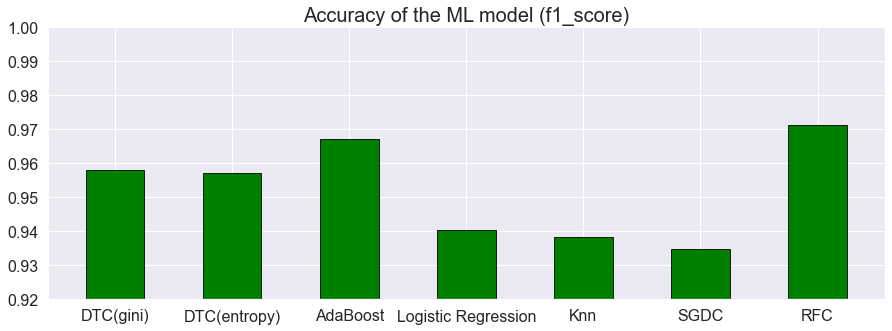

In [169]:
plt.figure(figsize=(15,5))
plt.title("Accuracy of the ML model (f1_score)",fontsize=20)
plt.bar(x=['DTC(gini)','DTC(entropy)','AdaBoost','Logistic Regression','Knn','SGDC',"RFC"],
        height=accur,width=0.5,color='green',edgecolor='k')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0.92,1)
plt.show()